In [175]:
import pandas as pd
import matplotlib.pylab as plt
from html import unescape
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import math
# crimes12a17 = pd.read_csv('/kaggle/input/bancodecrimes-2012a2017/BancoCrimesViolentos-Atualizado2012a2017.csv',encoding='latin1',sep=';')
# crimes18a23 = pd.read_csv('/kaggle/input/bancodecrimes-2018a2023/BancoCrimesViolentosAtualizadoSetembro2023.csv',encoding='latin1',sep=';')
# base = pd.read_excel('/kaggle/input/base-de-habitantes-atualizada/Base-Mg.xlsx')
crimes12a17 = pd.read_csv('./BancoCrimesViolentos-Atualizado2012a2017.csv',encoding='latin1',sep=';')
crimes18a23 = pd.read_csv('./BancoCrimesViolentosAtualizadoSetembro2023.csv',encoding='latin1',sep=';')
base = pd.read_excel('./Base-Mg.xlsx')

In [176]:

def decode_html(value):
    if isinstance(value, str):
        return unescape(value)
    else:
        pass
        return value

# Aplicar a função para todas as colunas
for coluna in base.columns:
    base[coluna] = base[coluna].apply(decode_html)

# promover o cabecario
# def renomearCabecario(df):
#     for i, coluna in enumerate(df.columns):
#         lista = base.values[0]
#         df = df.rename(columns={coluna : lista[i]})

#     df = df.rename(columns = {'Código [-]' : 'Cod IBGE'})
#     df = df.drop([0,df.index[-1:].values[0]])
#     return df

# base = renomearCabecario(base)
display(crimes12a17[:2])
display(crimes18a23[:2])
display(base[:2])




,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2012,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2012,7,7,NÃO


,Registros,Natureza,Município,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,0,Estupro Consumado,ABADIA DOS DOURADOS,310010,1,2018,10,10,NÃO
1,0,Estupro Consumado,ABAETE,310020,1,2018,7,7,NÃO


,Município [-],Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2020],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2020]
0,Abadia dos Dourados,3100104.0,abadiense,WANDERLEI LEMES SANTOS,880.461,6272.0,7.12,98.3,0.689,16.39,21894.89576,18793.52389,21962.98
1,Abaeté,3100203.0,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675.0,12.48,99.8,0.698,24.1,45220.32463,40774.21946,23905.96


    Import das bases  atualizadas 

In [177]:
# municipio crimes finais

dadosBrutos = pd.concat([crimes12a17,crimes18a23])
# dadosRegistro = dadosBrutos[dadosBrutos['Registros'] > 0] & dadosBrutos[dadosBrutos['Ano'] < '2023']
dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] < 2023)]
municipioCrimes = dadosRegistro.groupby('Município')[['Natureza']].count()
municipioCrimesFinal = municipioCrimes.sort_values('Natureza',ascending=False)
display(municipioCrimesFinal)


,Natureza
Município,
BELO HORIZONTE,1553
CONTAGEM,1330
BETIM,1148
UBERLANDIA,1108
JUIZ DE FORA,1094
...,...
ANTONIO PRADO DE MINAS,5
SERRA DA SAUDADE,5
DORESOPOLIS,5


In [178]:
axi = range(2012, 2019, 6)
for i, ano in enumerate(range(2017, 2024, 5)):
    print(f'Período de {axi[i]} até {ano}.')
    dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] >= axi[i]) & (dadosBrutos['Ano'] <= ano)]
    periodoCrimes = dadosRegistro.groupby('Município')[['Natureza']].count()
    periodoCrimesFinal = periodoCrimes.sort_values('Natureza', ascending=False)
    display(periodoCrimesFinal)



# criminalidade por tempo no estado

Período de 2012 até 2017.


,Natureza
Município,
BELO HORIZONTE,876
CONTAGEM,763
BETIM,658
JUIZ DE FORA,654
UBERLANDIA,616
...,...
DORESOPOLIS,2
ARACITABA,2
ANTONIO PRADO DE MINAS,2


Período de 2018 até 2022.


,Natureza
Município,
BELO HORIZONTE,677
CONTAGEM,567
UBERLANDIA,492
BETIM,490
RIBEIRAO DAS NEVES,462
...,...
WENCESLAU BRAZ,2
GRUPIARA,1
CARANAIBA,1


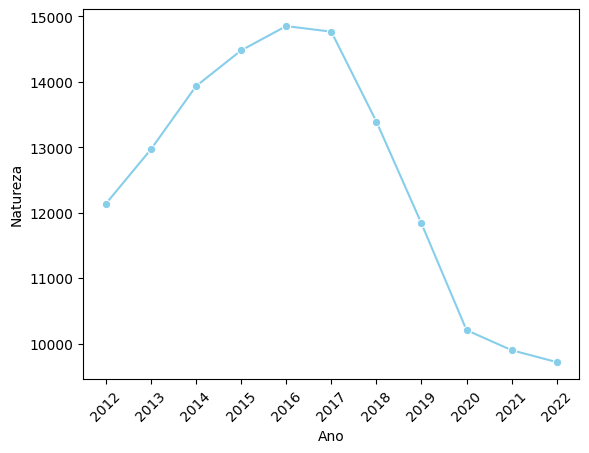

In [179]:
dadosRegistro = dadosBrutos[(dadosBrutos['Registros'] > 0) & (dadosBrutos['Ano'] < 2023)]
tempoCrimes = dadosRegistro.groupby('Ano')[['Natureza']].count()
tempoCrimesFinal = tempoCrimes.sort_values('Ano',ascending=True)
# display(tempoCrimesFinal)

sns.lineplot(data=tempoCrimesFinal, x='Ano', y='Natureza', marker='o', color='skyblue')
plt.xticks(tempoCrimesFinal.index, rotation=45)
plt.show()



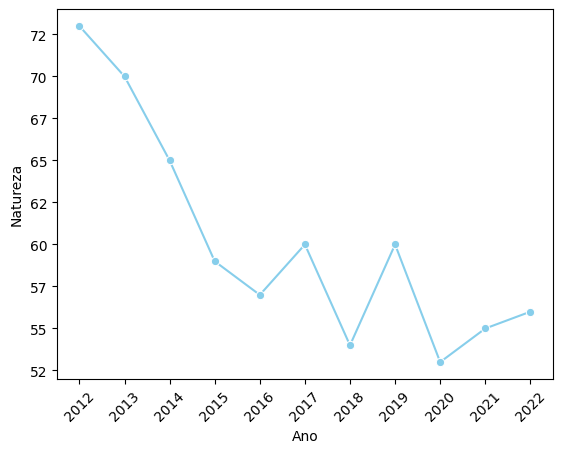

In [180]:

nome_do_municipio = "MURIAE"
filtradosMuriae = dadosRegistro.query('Município == @nome_do_municipio')
agrupadosMuriae = filtradosMuriae.groupby('Ano')[['Natureza']].count().round(0).astype(int)

sns.lineplot(data=agrupadosMuriae, x='Ano', y='Natureza', marker='o', color='skyblue')
plt.xticks(agrupadosMuriae.index, rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()

In [181]:
base = base.rename(columns={'Município [-]': 'Município','Código [-]':'Código','População residente - pessoas [2022]':'População residente - pessoas','Densidade demográfica - hab/km² [2022]':'Densidade demográfica - hab/km²','PIB per capita - R$ [2020]':'PIB per capita - R$'})

arrayColunasDrop =['Gentílico [-]','Prefeito [2021]','Área Territorial - km² [2022]','Escolarização <span>6 a 14 anos</span> - % [2010]','IDHM <span>Índice de desenvolvimento humano municipal</span> [2010]','Mortalidade infantil - óbitos por mil nascidos vivos [2020]','Receitas realizadas - R$ (×1000) [2017]','Despesas empenhadas - R$ (×1000) [2017]']
baseHabitantes = base.drop(arrayColunasDrop,axis=1)
display(baseHabitantes[:2])



,Município,Código,População residente - pessoas,Densidade demográfica - hab/km²,PIB per capita - R$
0,Abadia dos Dourados,3100104.0,6272.0,7.12,21962.98
1,Abaeté,3100203.0,22675.0,12.48,23905.96


In [182]:
baseHabitantes['Município'] = baseHabitantes['Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
dadosBrutos['Município'] = dadosBrutos['Município'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()

# Realize o merge
CrimesHabitantes = pd.merge(baseHabitantes, dadosBrutos, on='Município', how='outer')
display(CrimesHabitantes[:7])

,Município,Código,População residente - pessoas,Densidade demográfica - hab/km²,PIB per capita - R$,Registros,Natureza,Cod IBGE,Mês,Ano,RISP,RISP Nova,RMBH
0,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
1,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro de Vulnerável Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
2,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro de Vulnerável Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
3,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Estupro Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
4,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Extorsão Mediante Sequestro Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO
5,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,0.0,Homicídio Tentado,310010.0,1.0,2012.0,10.0,10.0,NÃO
6,ABADIA DOS DOURADOS,3100104.0,6272.0,7.12,21962.98,1.0,Roubo Consumado,310010.0,1.0,2012.0,10.0,10.0,NÃO


In [183]:
CrimesHabitantesPorRequistro = CrimesHabitantes[(CrimesHabitantes['Registros'] > 0) & (CrimesHabitantes['Ano'] < 2023)]
CrimesHabitantesFiltrados = CrimesHabitantesPorRequistro.groupby(['Município', 'População residente - pessoas'])[['Natureza']].count().reset_index()

CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =round(( CrimesHabitantesFiltrados['Natureza'] / CrimesHabitantesFiltrados['População residente - pessoas'])*1000,0).astype('int') 
# CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =int(((CrimesHabitantesFiltrados['Natureza'] / CrimesHabitantesFiltrados['População residente - pessoas'])*1000).round(0))
display(CrimesHabitantesFiltrados[:7])

,Município,População residente - pessoas,Natureza,Taxa de crimes por mil habitantes
0,ABADIA DOS DOURADOS,6272.0,92,15
1,ABAETE,22675.0,293,13
2,ACAIACA,3909.0,93,24
3,ACUCENA,8943.0,108,12
4,AGUA BOA,12589.0,202,16
5,AGUA COMPRIDA,2108.0,50,24
6,AGUANIL,4357.0,81,19


In [184]:
CrimesHabitantesFiltrados = CrimesHabitantesFiltrados.sort_values(by='Taxa de crimes por mil habitantes',ascending=False)
display(CrimesHabitantesFiltrados[:30])

,Município,População residente - pessoas,Natureza,Taxa de crimes por mil habitantes
428,LEANDRO FERREIRA,3199.0,106,33
514,NOVA PORTEIRINHA,6706.0,222,33
462,MATHIAS LOBATO,3038.0,100,33
191,CONCEICAO DO PARA,5415.0,173,32
574,PERIQUITO,6553.0,196,30
644,ROMARIA,3386.0,102,30
827,VERDELANDIA,7672.0,222,29
183,COMENDADOR GOMES,2773.0,79,28
109,CAJURI,4088.0,110,27
584,PIRAJUBA,5537.0,144,26


In [185]:
CrimesHabitantesFiltrados = CrimesHabitantesFiltrados.sort_values(by='Taxa de crimes por mil habitantes', ascending=False)

# Adicione uma coluna 'Classificacao' com a posição da cidade com base na taxa de crimes
CrimesHabitantesFiltrados['Classificacao'] = range(1, len(CrimesHabitantesFiltrados) + 1)
cidade_pesquisada = 'MURIAE'
linha_cidade_pesquisada = CrimesHabitantesFiltrados.loc[CrimesHabitantesFiltrados['Município'] == cidade_pesquisada ]
display(CrimesHabitantesFiltrados)
display(linha_cidade_pesquisada)

,Município,População residente - pessoas,Natureza,Taxa de crimes por mil habitantes,Classificacao
428,LEANDRO FERREIRA,3199.0,106,33,1
514,NOVA PORTEIRINHA,6706.0,222,33,2
462,MATHIAS LOBATO,3038.0,100,33,3
191,CONCEICAO DO PARA,5415.0,173,32,4
574,PERIQUITO,6553.0,196,30,5
...,...,...,...,...,...
775,SERRANOS,1990.0,3,2,837
766,SENHORA DOS REMEDIOS,10384.0,25,2,838
492,MONTES CLAROS,414240.0,943,2,839
188,CONCEICAO DAS PEDRAS,2772.0,3,1,840


,Município,População residente - pessoas,Natureza,Taxa de crimes por mil habitantes,Classificacao
498,MURIAE,104108.0,662,6,726


In [186]:
# calcular media

# Calcular a média de crimes violentos por habitante na cidade
media_crimes_cidade = linha_cidade_pesquisada["Natureza"].sum() / linha_cidade_pesquisada["População residente - pessoas"].sum()
display(media_crimes_cidade)

# Calcular a média de crimes violentos por habitante no estado
media_crimes_estado = CrimesHabitantesFiltrados["Natureza"].sum() / CrimesHabitantesFiltrados["População residente - pessoas"].sum()
display(media_crimes_estado) 

#converter em porcentagem
media_crimes_cidade_porcentagem = round((media_crimes_cidade * 100), 2)
media_crimes_estado_porcentagem = round((media_crimes_estado * 100), 2) 

# Comparar as médias
if media_crimes_cidade > media_crimes_estado:
    print("A média de crimes violentos por habitante na cidade é maior do que a média de crimes violentos por habitante no estado.")
    print("media da cidade: ({}%) e media do estado: ({}%).".format(media_crimes_cidade_porcentagem, media_crimes_estado_porcentagem))
else:
    print("A média de crimes violentos por habitante na cidade é menor do que a média de crimes violentos por habitante no estado.")
    print("media da cidade: ({}%) e media do estado: ({}%).".format(media_crimes_cidade_porcentagem, media_crimes_estado_porcentagem))


0.006358781265608791

0.006715603826184648

A média de crimes violentos por habitante na cidade é menor do que a média de crimes violentos por habitante no estado.
media da cidade: (0.64%) e media do estado: (0.67%).


In [187]:
CrimesHabitantesFiltrados = CrimesHabitantesPorRequistro.groupby(['Município', 'População residente - pessoas', 'Ano'])[['Natureza']].count().reset_index()
CrimesHabitantesFiltrados['Taxa de crimes por mil habitantes'] =round(( CrimesHabitantesFiltrados['Natureza'] / CrimesHabitantesFiltrados['População residente - pessoas'] * 1000), 2)
# CrimesHabitantesFiltrados['Classificacao'] = range(1, len(CrimesHabitantesFiltrados) + 1)

cidade_pesquisada = 'MURIAE'
linha_cidade_pesquisada = CrimesHabitantesFiltrados.loc[CrimesHabitantesFiltrados['Município'] == cidade_pesquisada ]

# sns.lineplot(data=linha_cidade_pesquisada, x='Ano', y='Taxa de crimes por mil habitantes', marker='o', color='skyblue')
# sns.lineplot(data=CrimesHabitantesFiltrados, x='Ano', y='Taxa de crimes por mil habitantes', marker='o', color='orange')
display(linha_cidade_pesquisada)
display(CrimesHabitantesFiltrados)
# plt.xticks(agrupadosMuriae.index, rotation=45)
# ax = plt.gca()
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: "%.2f" % x))
# plt.show()

,Município,População residente - pessoas,Ano,Natureza,Taxa de crimes por mil habitantes
5271,MURIAE,104108.0,2012.0,73,0.70
5272,MURIAE,104108.0,2013.0,70,0.67
5273,MURIAE,104108.0,2014.0,65,0.62
5274,MURIAE,104108.0,2015.0,59,0.57
5275,MURIAE,104108.0,2016.0,57,0.55
5276,MURIAE,104108.0,2017.0,60,0.58
5277,MURIAE,104108.0,2018.0,54,0.52
5278,MURIAE,104108.0,2019.0,60,0.58
5279,MURIAE,104108.0,2020.0,53,0.51
5280,MURIAE,104108.0,2021.0,55,0.53


,Município,População residente - pessoas,Ano,Natureza,Taxa de crimes por mil habitantes
0,ABADIA DOS DOURADOS,6272.0,2012.0,10,1.59
1,ABADIA DOS DOURADOS,6272.0,2013.0,8,1.28
2,ABADIA DOS DOURADOS,6272.0,2014.0,10,1.59
3,ABADIA DOS DOURADOS,6272.0,2015.0,7,1.12
4,ABADIA DOS DOURADOS,6272.0,2016.0,11,1.75
...,...,...,...,...,...
8874,WENCESLAU BRAZ,2356.0,2015.0,1,0.42
8875,WENCESLAU BRAZ,2356.0,2016.0,2,0.85
8876,WENCESLAU BRAZ,2356.0,2017.0,2,0.85
8877,WENCESLAU BRAZ,2356.0,2021.0,1,0.42
